In [2]:
# For dataframe manipulation
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Disable Python warnings
import warnings
warnings.filterwarnings("ignore")

# Dispay all columns
pd.set_option('display.max_columns', None)

In [3]:
# Read-in all datasets

founders = pd.read_csv('dataset2.csv')
startups = pd.read_csv('dataset3.csv')
startups_2 = pd.read_csv('dataset4.csv')
acquisitions = pd.read_csv('acquisitions.csv')
degrees = pd.read_csv('degrees.csv')
funding_rounds = pd.read_csv('funding_rounds.csv')
funds = pd.read_csv('funds.csv')
investments = pd.read_csv('investments.csv')
ipos = pd.read_csv('ipos.csv')
milestones = pd.read_csv('milestones.csv')
objects = pd.read_csv('objects.csv')
offices = pd.read_csv('offices.csv')
people = pd.read_csv('people.csv')
relationships = pd.read_csv('relationships.csv')

# Founders

In [3]:
founders.head()

,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,Founder
0,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,0
1,JB Straubel,Co-Founder and CTO,The story of JB Straubel's career started at a...,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,1
2,Mark Zuckerberg,Founder & CEO,Mark Zuckerberg is the founder and CEO of Face...,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1,1
3,Ross Mason,Founder and VP of Product Strategy,"Created the Mule Project, Founded MuleSoft, go...",1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1,1
4,Rahul Gandhi,Co-Founder & SVP of Finance Operations,Rahul is a Co-founder & Senior Vice President ...,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1


### Biographies

In [5]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

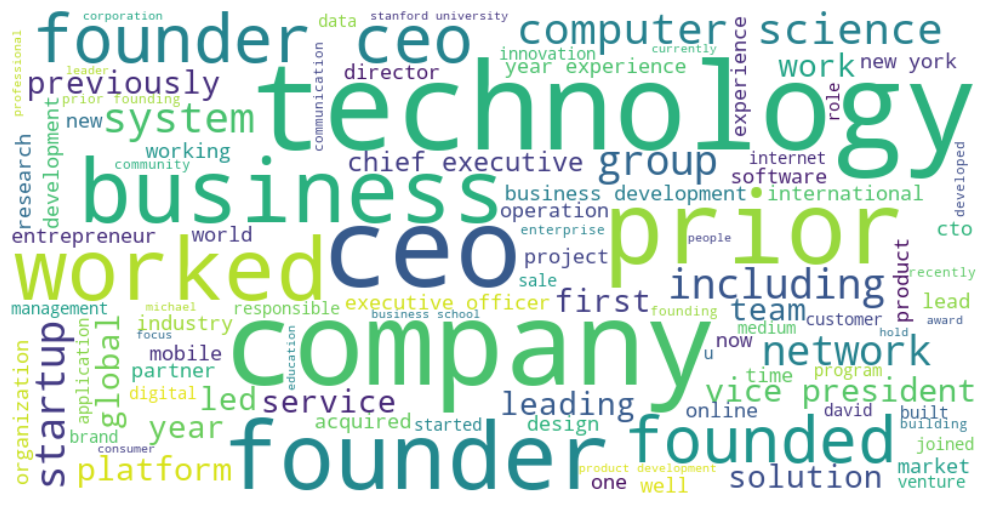

In [6]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalnum() and word not in STOPWORDS]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Filter out rows where 'Bio' is not available
founders_with_bio = founders[founders['Bio'] != '0']

# Apply preprocessing to all bios
clean_bios = founders_with_bio['Bio'].apply(preprocess_text)
# Concatenate cleaned bios into a single string
clean_all_bios = ' '.join(clean_bios)

# Generate word cloud with weighted word size
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=100, max_words=100).generate(clean_all_bios)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
#plt.savefig('word_cloud.png')
plt.show()

In [7]:
# Substitute binary company types to word naming
co_type_dict = {1: 'For-Profit', 0: 'Nonprofit'}
founders['Company Type'] = founders['Company Type'].map(co_type_dict)
founders['Company Type'].value_counts()

Company Type
For-Profit    15681
Nonprofit      2680
Name: count, dtype: int64

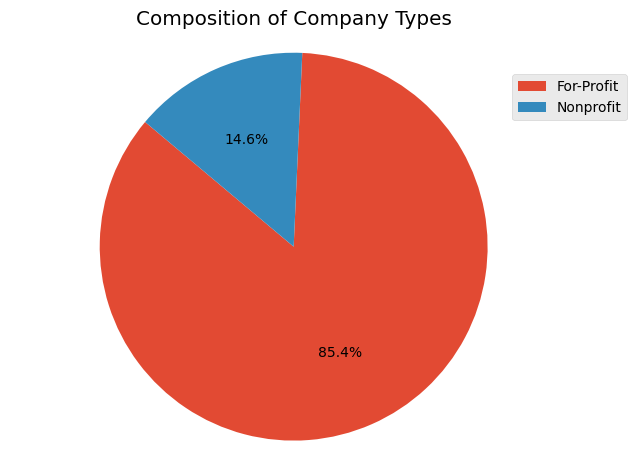

In [8]:
plt.pie(founders['Company Type'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Composition of Company Types')

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="right", labels = ['For-Profit', 'Nonprofit'],
           bbox_to_anchor=(0.6, 0.55, 0.5, 0.6))

plt.axis('equal')
plt.tight_layout()
#plt.savefig('co_type.png')
plt.show()

In [9]:
# Subtitute gender integers to word naming
gender_dict = {1: 'Male', 0: 'Female', 2: 'Other'}
founders['Gender'] = founders['Gender'].map(gender_dict)
gender = founders['Gender']
gender.value_counts()

Gender
Male      16521
Female     1709
Other       131
Name: count, dtype: int64

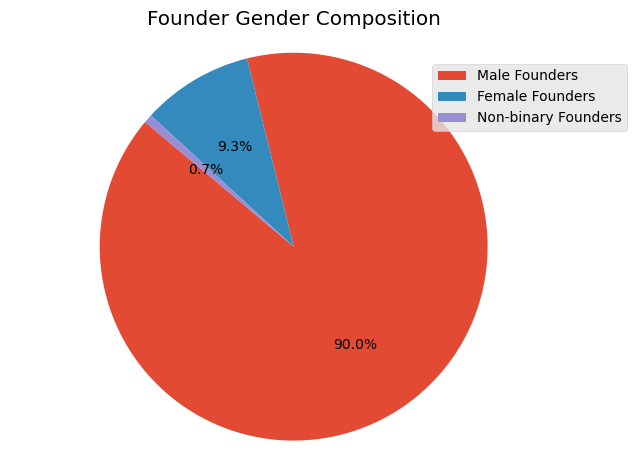

In [10]:
plt.pie(gender.value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Founder Gender Composition')
 
plt.legend(loc="right", labels = ['Male Founders', 'Female Founders', 'Non-binary Founders'],
           bbox_to_anchor=(0.6, 0.55, 0.5, 0.6))

plt.axis('equal')
plt.tight_layout()
#plt.savefig('gender_pie.png')
plt.show()

In [11]:
# Create new gender-based dataframes
f_founders = founders[founders['Gender'] == 'Female']
m_founders = founders[founders['Gender'] == 'Male']
o_founders = founders[founders['Gender'] == 'Non-binary']

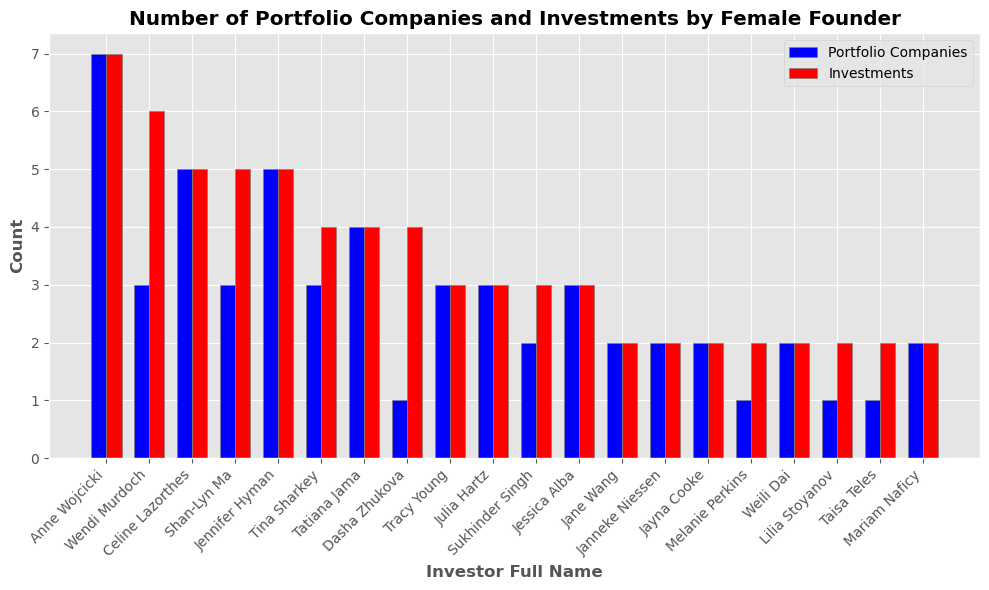

In [12]:
# Group female founders by no. of investments and portfolio companies
f_investments = f_founders.groupby('Full Name')[['Number of Investments_x', 'Number of Portfolio Companies']].sum().sort_values(by='Number of Investments_x', ascending=False)[:20]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of bars on x-axis
r1 = range(len(f_investments))
r2 = [x + bar_width for x in r1]

# Plotting bars
ax.bar(r1, f_investments['Number of Portfolio Companies'], color='b', width=bar_width, edgecolor='grey', label='Portfolio Companies')
ax.bar(r2, f_investments['Number of Investments_x'], color='r', width=bar_width, edgecolor='grey', label='Investments')

# Adding labels
ax.set_xlabel('Investor Full Name', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Number of Portfolio Companies and Investments by Female Founder', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(f_investments))])
ax.set_xticklabels(f_investments.index, rotation=45, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
#plt.savefig('f_investors.png')
plt.show()

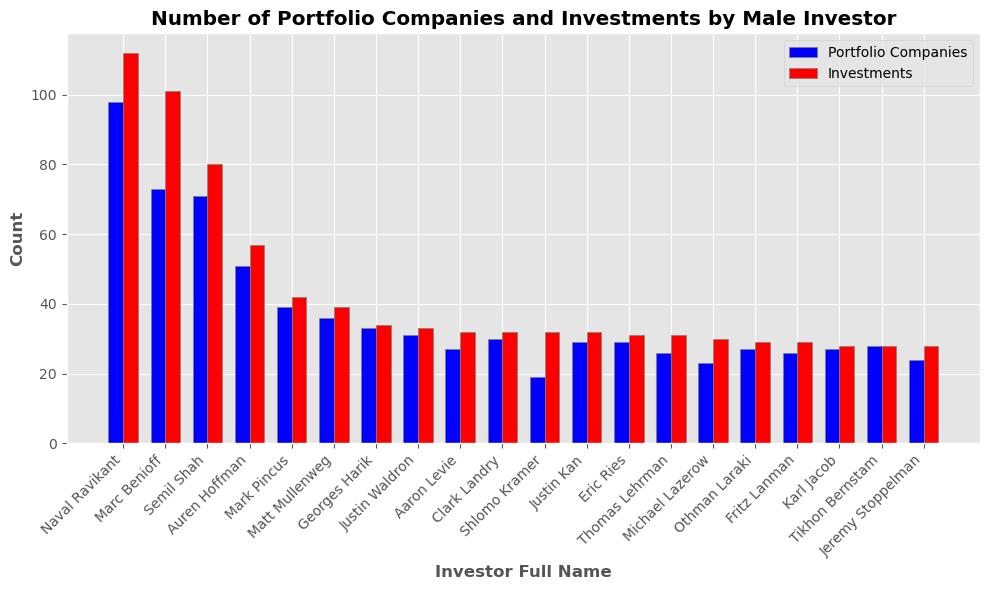

In [13]:
# Repeat process for male founders
m_investments = m_founders.groupby('Full Name')[['Number of Investments_x', 'Number of Portfolio Companies']].sum().sort_values(by='Number of Investments_x', ascending=False)[:20]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of bars on x-axis
r1 = range(len(m_investments))
r2 = [x + bar_width for x in r1]

# Plotting bars
ax.bar(r1, m_investments['Number of Portfolio Companies'], color='b', width=bar_width, edgecolor='grey', label='Portfolio Companies')
ax.bar(r2, m_investments['Number of Investments_x'], color='r', width=bar_width, edgecolor='grey', label='Investments')

# Adding labels
ax.set_xlabel('Investor Full Name', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Number of Portfolio Companies and Investments by Male Investor', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(m_investments))])
ax.set_xticklabels(m_investments.index, rotation=45, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
#plt.savefig('m_investors.png')
plt.show()

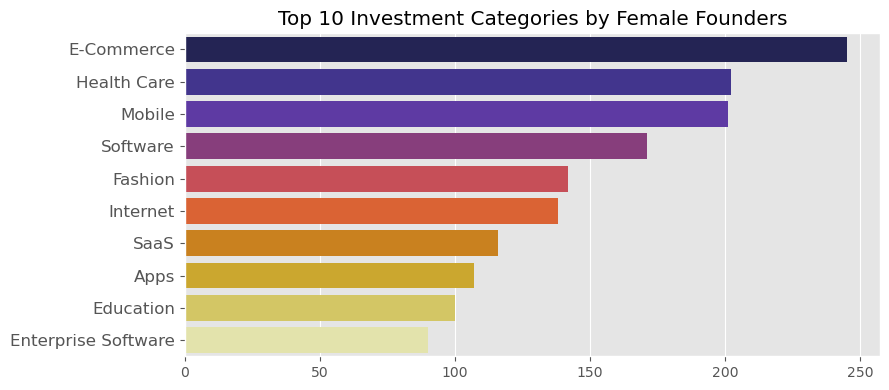

In [14]:
# Create series for top 10 female investment categories
top_f_categories = f_founders['Categories'].str.split(', ', expand=True).stack().value_counts()[:10]

plt.figure(figsize=(9,4))
sns.barplot(x=top_f_categories.values, y=top_f_categories.index, palette='CMRmap')
plt.title('Top 10 Investment Categories by Female Founders')
plt.tight_layout()

# Make y-labels bold and larger
for tick in plt.gca().get_yticklabels():
    #tick.set_fontweight('bold')
    tick.set_fontsize(12)
    
plt.tight_layout()
plt.savefig('f_categories.png')
plt.show()

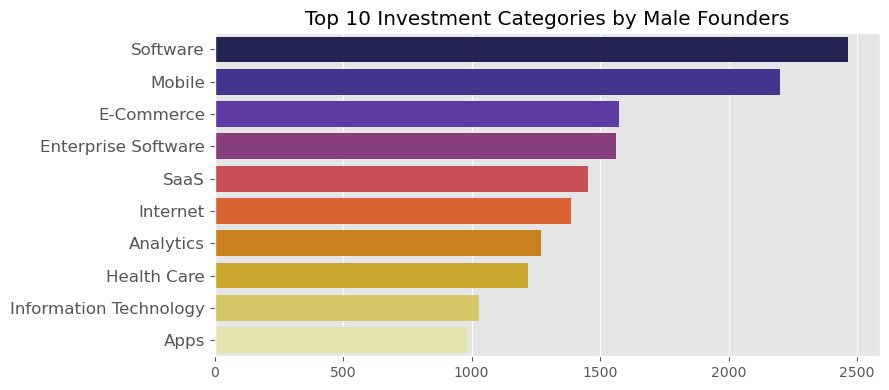

In [15]:
# Repeat for male founders
top_m_categories = m_founders['Categories'].str.split(', ', expand=True).stack().value_counts()[:10]

plt.figure(figsize=(9,4))
sns.barplot(x=top_m_categories.values, y=top_m_categories.index, palette='CMRmap')
plt.title('Top 10 Investment Categories by Male Founders')
plt.tight_layout()

# Make y-labels bold and larger
for tick in plt.gca().get_yticklabels():
    #tick.set_fontweight('bold')
    tick.set_fontsize(12)
plt.tight_layout()
plt.savefig('m_categories.png')
plt.show()

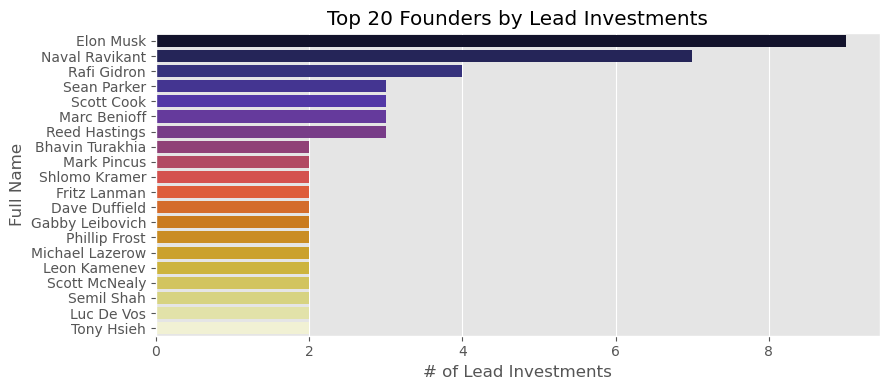

In [16]:
# Top 20 founders by No. of Lead Investments
lead_investments = founders.groupby('Full Name')['Number of Lead Investments_x'].sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(9,4))
sns.barplot(x=lead_investments.values, y=lead_investments.index, palette='CMRmap')
plt.xlabel('Lead Investments')
plt.title('Top 20 Founders by Lead Investments')
plt.xlabel('# of Lead Investments')
plt.tight_layout()
#plt.savefig('lead.png')
plt.show()

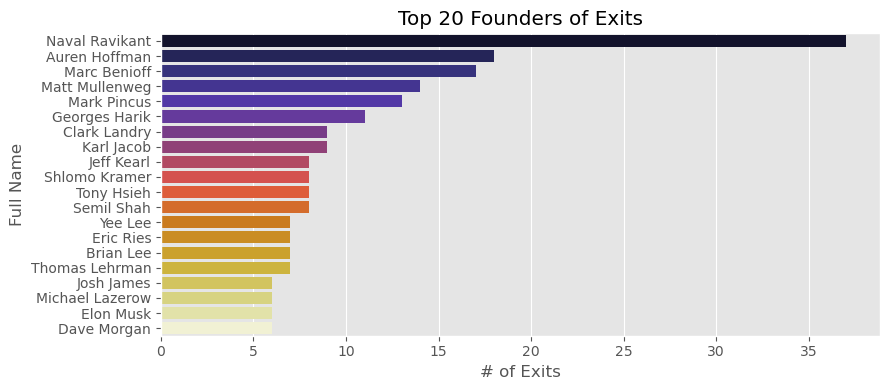

In [17]:
# Top 20 founders by No. of Exits
founders_exits = founders.groupby('Full Name')['Number of Exits_x'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(9,4))
sns.barplot(x=founders_exits.values, y=founders_exits.index, palette='CMRmap')
plt.xlabel('Exits')
plt.title('Top 20 Founders of Exits')
plt.xlabel('# of Exits')
plt.tight_layout()
#plt.savefig('exits.png')
plt.show()

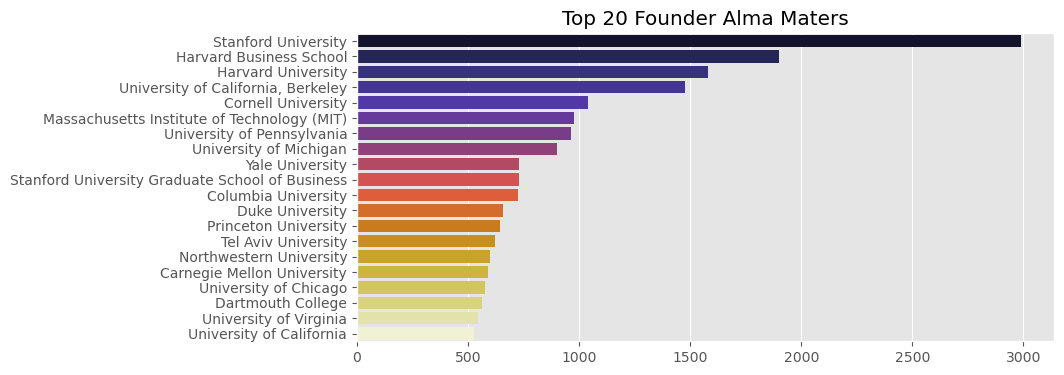

In [18]:
# Top 20 instutions attended by founders
top_institutions = degrees.institution.value_counts()[:20]

plt.figure(figsize=(9,4))
sns.barplot(x=top_institutions.values, y=top_institutions.index, palette='CMRmap')
plt.title('Top 20 Founder Alma Maters')
plt.ylabel(None)
plt.savefig('alma_maters.png')
plt.show()

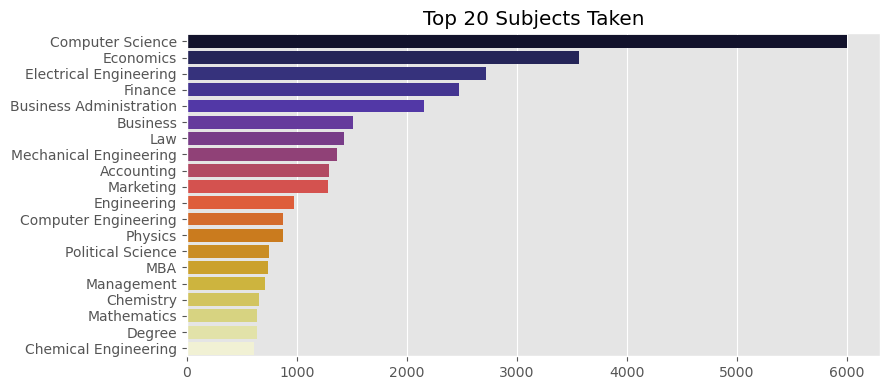

In [19]:
top_subjects = degrees.subject.value_counts()[:20]

plt.figure(figsize=(9,4))
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='CMRmap')
plt.title('Top 20 Subjects Taken')
plt.ylabel(None)
plt.tight_layout()
#plt.savefig('subjects.png')
plt.show()

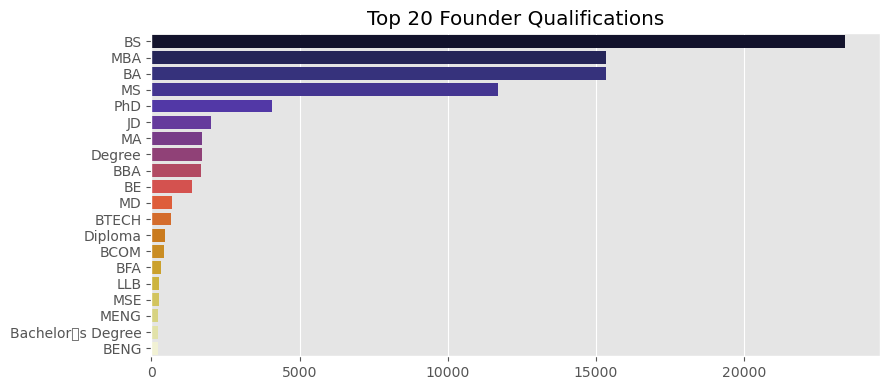

In [20]:
top_degrees = degrees.degree_type.value_counts()[:20]

plt.figure(figsize=(9,4))
sns.barplot(x=top_degrees.values, y=top_degrees.index,palette='CMRmap')
plt.title('Top 20 Founder Qualifications')
plt.ylabel(None)
plt.tight_layout()
#plt.savefig('qualif.png')
plt.show()

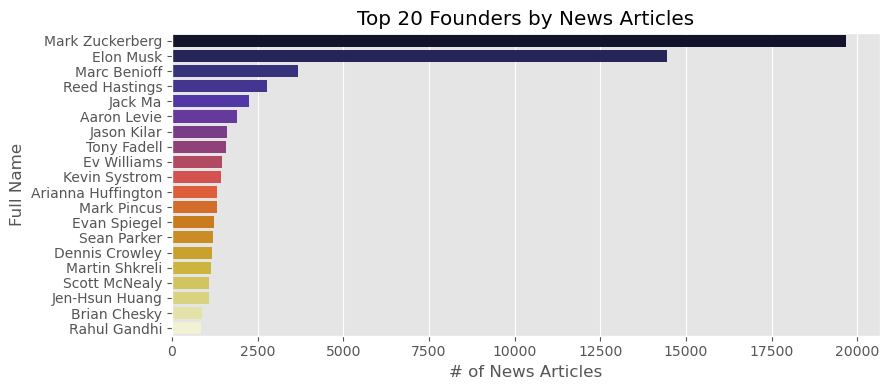

In [21]:
# Top 20 Founders by News Article Appearances
founders_news = founders.groupby('Full Name')['Number of News Articles'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(9,4))
sns.barplot(x=founders_news.values, y=founders_news.index, palette='CMRmap')
plt.title('Top 20 Founders by News Articles')
plt.xlabel('# of News Articles')
plt.tight_layout()
#plt.savefig('news_articles.png')
plt.show()

# Investment Funds

In [73]:
funds.head()

,id,fund_id,object_id,name,raised_amount,raised_currency_code,created_at,updated_at
0,1,1,f:371,Second Fund,300000000.0,USD,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,200750000.0,USD,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,650000000.0,USD,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,625000000.0,USD,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,200000000.0,USD,2009-01-03 09:51:58,2013-09-03 16:34:54


In [74]:
# remove null values
funds.dropna(axis=1, inplace=True)

In [75]:
funds['updated_at'] = pd.to_datetime(funds['updated_at'])

In [76]:
# convert other currencies to USD
conversion_rates = {'GBP': 0.79, 'EUR': 0.92, 'CAD': 1.36,
                   'JPY': 151.36, 'SEK': 10.57, 'AUD': 1.54}

def convert_to_usd(row):
    amount = row['raised_amount']
    currency = row['raised_currency_code']
    if currency == 'USD':
        return amount
    elif currency in conversion_rates:
        return amount / conversion_rates[currency]
    
funds['raised_amount'] = funds.apply(convert_to_usd, axis=1)

In [77]:
funds_raised = funds.groupby(['updated_at'])['raised_amount'].mean()
#funds_raised = raised_overtime.sort_values(ascending=False)[1:]

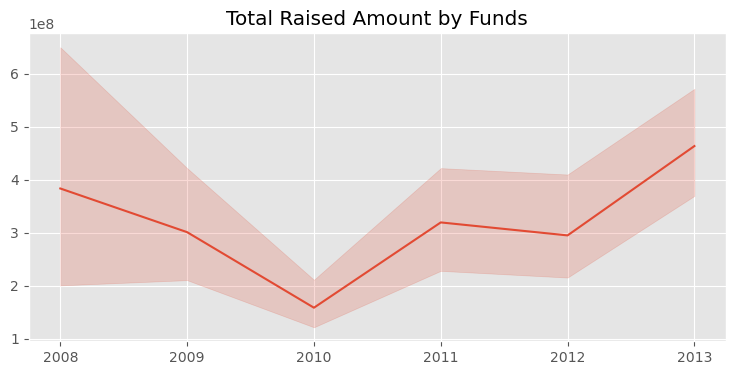

In [78]:
plt.figure(figsize=(9,4))
sns.lineplot(x=funds_raised.index.year, y=funds_raised.values)
plt.title('Total Raised Amount by Funds')
plt.xlabel(None)
#plt.savefig('funds_raised.png')
plt.show()

In [79]:
funds[funds['name'] == 'Deric R. Mccloud']

,id,fund_id,object_id,name,raised_amount,raised_currency_code,created_at,updated_at
1322,1443,1443,f:10889,Deric R. Mccloud,3.983908e+08,USD,2013-09-09 21:40:01,2013-09-09 23:38:45


In [80]:
# Replace anomalous amount entry with mean 
funds.loc[1322, 'raised_amount'] = funds['raised_amount'].mean()

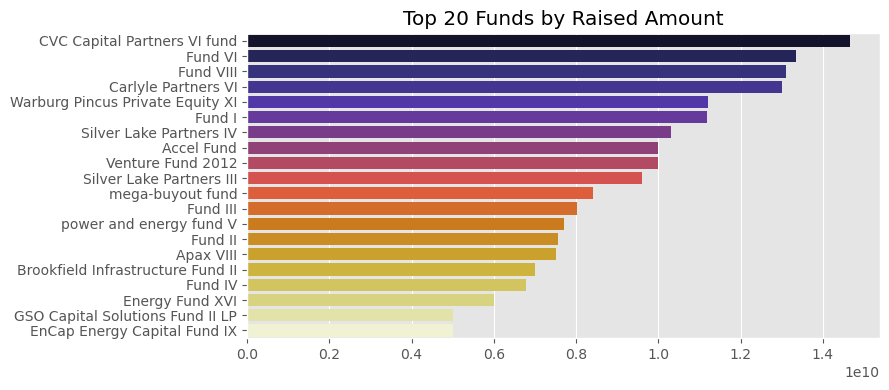

In [81]:
# Top 20 Funds by amount raised
top_funds = funds.groupby('name')['raised_amount'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(9,4))
sns.barplot(x=top_funds.values, y=top_funds.index, palette='CMRmap')
plt.title('Top 20 Funds by Raised Amount')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
#plt.savefig('top_funds.png')
plt.show()

# Start-ups

In [90]:
startups.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


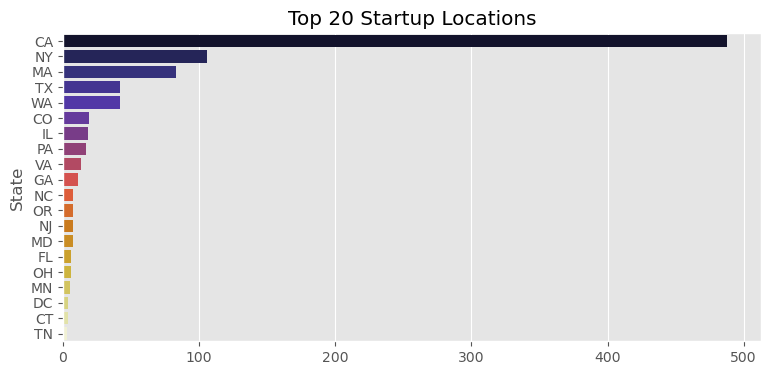

In [91]:
top_states = startups.state_code.value_counts()[:20]

plt.figure(figsize=(9,4))
sns.barplot(x=top_states.values, y=top_states.index, palette='CMRmap')
plt.title('Top 20 Startup Locations')
plt.ylabel('State')
plt.show()

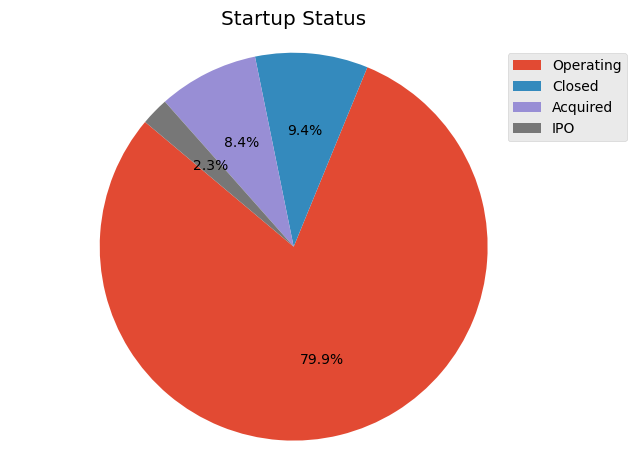

In [92]:
plt.pie(startups_2.status.value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Startup Status')

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="right", labels = ['Operating', 'Closed', 'Acquired', 'IPO'],
           bbox_to_anchor=(0.6, 0.55, 0.5, 0.6))

plt.axis('equal')
plt.tight_layout()
#plt.savefig('startup_status_pie.png')
plt.show()

In [68]:
# Interactive map of startup locations and their status
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

"""
To view the map you need an account with MapBox.
Go to your profile and get API token & copy-paste as a string to the variable below.
"""
mapbox_access_token = "MAP_ACCESS_TOP"

fig = px.scatter_mapbox(startups, lat='latitude', lon='longitude', color='status', hover_name='name', zoom=3)
fig.update_layout(mapbox_style="open-street-map", mapbox_accesstoken=mapbox_access_token)
fig.show()

NameError: name 'industry' is not defined

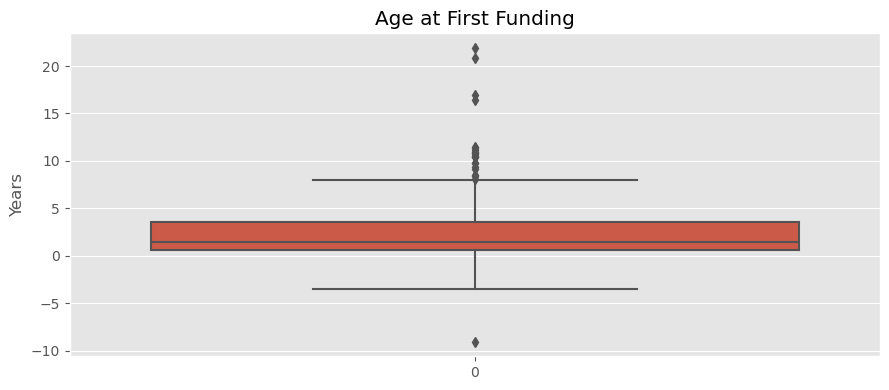

In [93]:
plt.figure(figsize=(9,4))
sns.boxplot(startups.age_first_funding_year)
plt.title('Age at First Funding')
plt.ylabel('Years')
plt.tight_layout()
#plt.savefig('age_first_funding.png')
plt.show()

In [94]:
startups[startups['funding_total_usd'] == startups.funding_total_usd.max()]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
364,86,WA,30.63248,-86.984345,98033,c:13219,Kirkland,NaN,Clearwire,1,10/1/2003,NaN,5/6/2008,2/27/2013,4.6,9.4164,5.2575,9.7753,19,4,5700000000,2,WA,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:13219,0,0,0,0,0,0,4.25,1,acquired


In [99]:
# Decrease outlier funding amount for better visualisation
startups.loc[364, 'funding_total_usd'] = startups.funding_total_usd.mean()

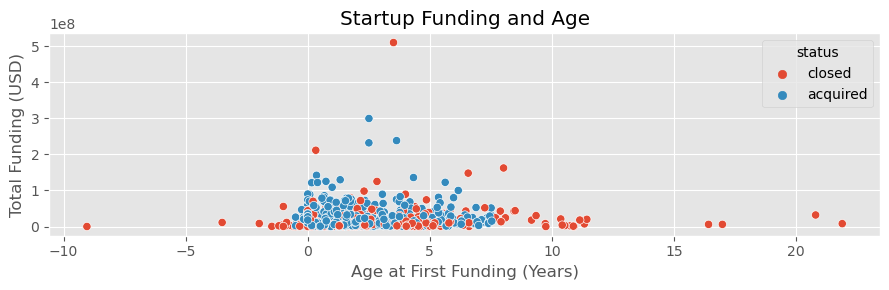

In [100]:

plt.figure(figsize=(9, 3))

# Get the unique values of 'status' column
status_order = startups['status'].unique()

# Reverse the order of the unique values
status_order = status_order[::-1]

sns.scatterplot(x='age_first_funding_year', y='funding_total_usd', hue='status', data=startups, hue_order=status_order)

plt.title('Startup Funding and Age')
plt.xlabel('Age at First Funding (Years)')
plt.ylabel('Total Funding (USD)')
plt.tight_layout()
#plt.savefig('funding_age_scatter.png')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

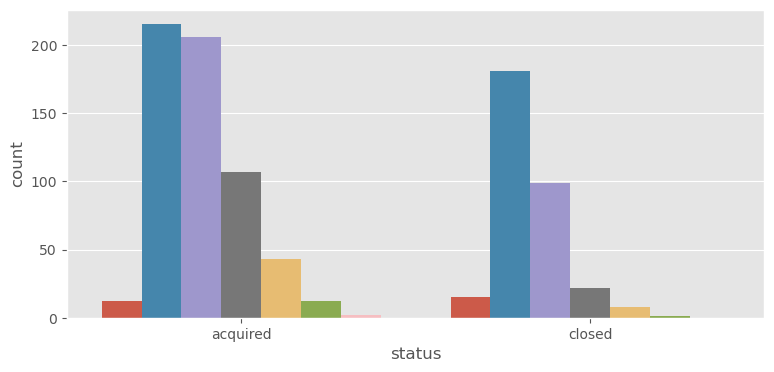

In [105]:
investor_cols = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

plt.figure(figsize=(9, 4))
sns.countplot(data=startups, x='status', hue=startups[investor_cols].sum(axis=1))
plt.title('Investor Types by Startup Status')
plt.xlabel('Startup Status')
plt.ylabel('Count')
plt.legend(title='Investor Types', loc='upper right', labels=investor_cols)
plt.tight_layout()
#plt.savefig('investor_types_by_startup_status.png')
plt.show()

In [107]:
acquisitions.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [108]:
conversion_rates = {'GBP': 0.79, 'EUR': 0.92, 'CAD': 1.36,
                   'JPY': 151.36, 'SEK': 10.57, 'AUD': 1.54}

def convert_to_usd(row):
    amount = row['price_amount']
    currency = row['price_currency_code']
    if currency == 'USD':
        return amount
    elif currency in conversion_rates:
        return amount / conversion_rates[currency]
    
acquisitions['price_amount'] = acquisitions.apply(convert_to_usd, axis=1)

In [109]:
# Convert to datetime
acquisitions['updated_at'] = pd.to_datetime(acquisitions['updated_at'])

In [111]:
acquisitions[acquisitions.price_amount == acquisitions.price_amount.max()]

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
5347,5348,5803,c:38446,c:2467,NaN,2.600000e+12,USD,1984-06-27,http://www.autoobserver.com/2008/05/hewlett-pa...,"Hewlett-Packard Buying EDS, Once GM Owned",2011-07-14 00:16:07,2011-07-14 00:16:07


In [112]:
# Correct Hewlett-Packard acquisition of EDS price amount
acquisitions.loc[5347, 'price_amount'] = 13900000000.0

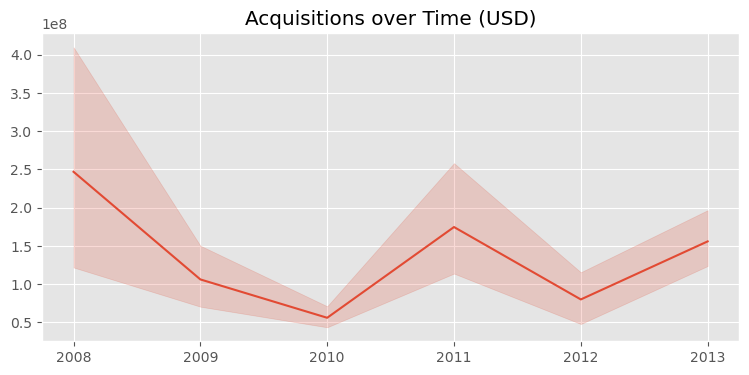

In [113]:
acq_overtime = acquisitions.groupby('updated_at')['price_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(9,4))
sns.lineplot(x=acq_overtime.index.year, y=acq_overtime.values)
plt.title('Acquisitions over Time (USD)')
plt.xlabel(None)
#plt.savefig('aqc_overtime.png')
plt.show()

In [114]:
# acquisition terms
term_code = acquisitions.term_code.value_counts()

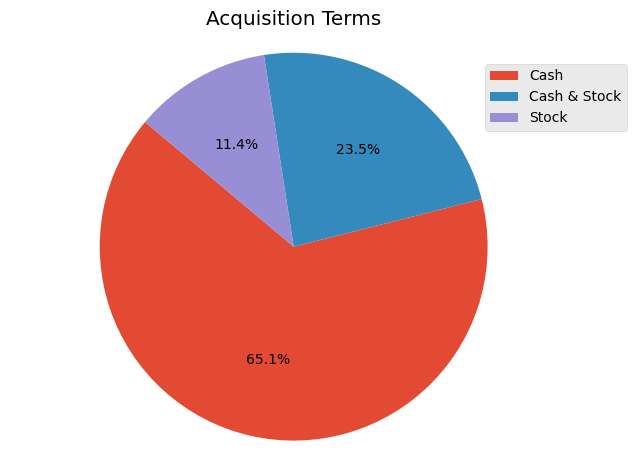

In [115]:
plt.pie(term_code, autopct='%1.1f%%', startangle=140)
plt.title('Acquisition Terms')

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="right", labels = ['Cash', 'Cash & Stock', 'Stock'],
           bbox_to_anchor=(0.6, 0.55, 0.5, 0.6))
plt.axis('equal')
plt.tight_layout()
plt.savefig('term_code.png')
plt.show()

In [116]:
funding_rounds['updated_at'] = pd.to_datetime(funding_rounds['updated_at'])

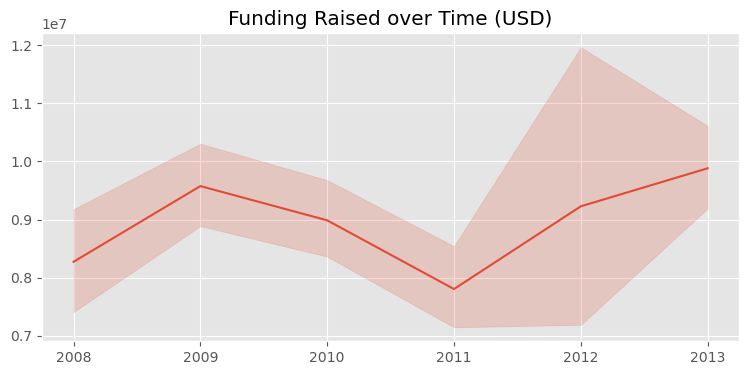

In [117]:
funding_raised = funding_rounds.groupby('updated_at')['raised_amount_usd'].sum().sort_values(ascending=False)

plt.figure(figsize=(9,4))
sns.lineplot(x=funding_raised.index.year, y=funding_raised.values)
plt.title('Funding Raised over Time (USD)')
plt.xlabel(None)
#plt.savefig('funding_raised.png')
plt.show()

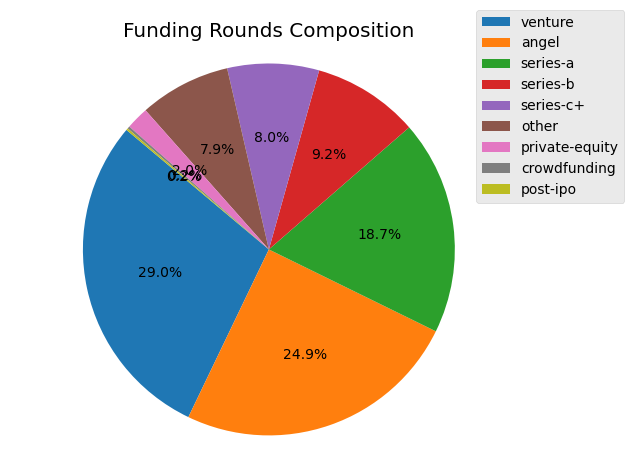

In [4]:
rounds = funding_rounds.funding_round_type.value_counts()

colors = plt.cm.tab10.colors[:len(rounds)]

plt.pie(rounds.values, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Funding Rounds Composition')

# Place the chart legend in a position which does not overlap with other components
plt.legend(loc="right", labels=['venture', 'angel', 'series-a', 'series-b',
                                'series-c+', 'other', 'private-equity',
                                'crowdfunding', 'post-ipo'], bbox_to_anchor=(0.6, 0.55, 0.6, 0.6))
plt.axis('equal')
plt.tight_layout()
#plt.savefig('funing_rounds_comp.png')
plt.show()